In [235]:
import pandas as pd

full_df = pd.read_csv('data/full_df-0.csv')
full_df.drop(columns=['x-axis', 'y-axis', 'ice_mask'], inplace=True)
full_df.describe()

,precipitation,air_temp,ocean_temp,ocean_salinity,ice_thickness,ice_velocity
count,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000
mean,459.218673,253.250122,272.661120,14.612805,786.863560,32.871003
std,321.010247,17.451287,0.989742,7.036216,1165.988340,179.369400
min,-26.648338,212.949539,271.142242,0.112596,-16.252274,-123.940895
25%,128.605972,239.715210,271.964874,8.552329,0.000000,-1.000000
50%,477.346161,260.951752,272.414734,14.867147,0.000000,-1.000000
75%,704.524414,266.593628,273.058380,18.721558,1657.558350,5.325965
max,2290.933838,275.501678,277.330841,35.370872,4588.459961,3421.989746


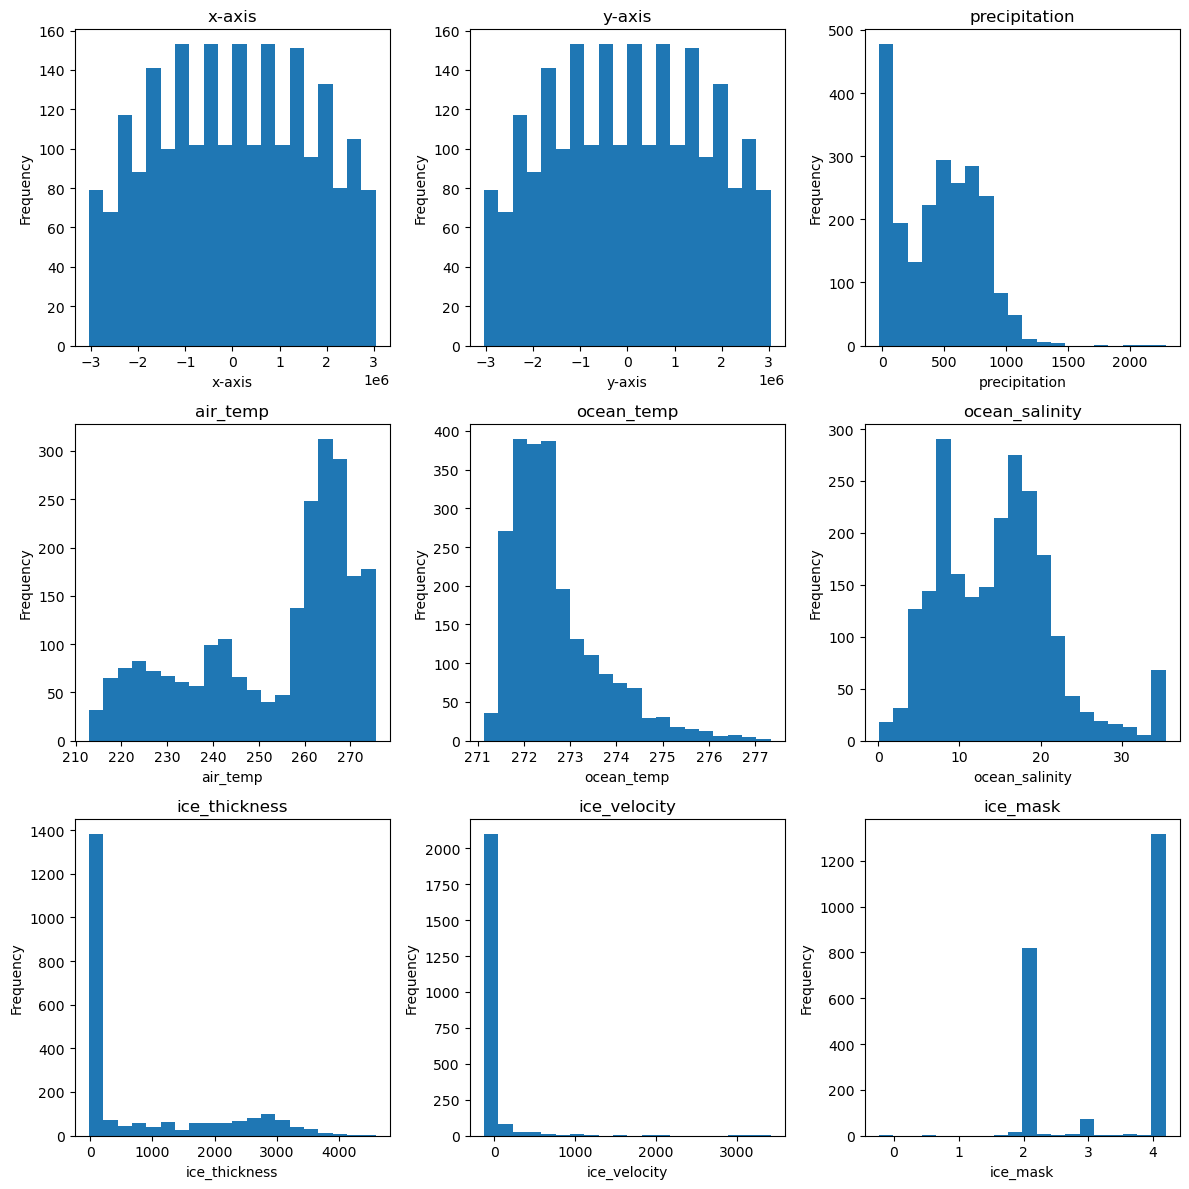

In [76]:
import matplotlib.pyplot as plt

def plot_attribute_distributions(df):
    attributes = df.columns  # List of all column names in the DataFrame
    n_attributes = len(attributes)
    
    # Calculate the number of rows needed for two columns
    nrows = (n_attributes + 1) // 3
    
    # Set up the matplotlib figure with two columns
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(12, nrows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, attribute in enumerate(attributes):
        # Plotting the histogram for each attribute
        df[attribute].plot(kind='hist', bins=20, ax=axes[i])
        axes[i].set_title(f'{attribute}')
        axes[i].set_xlabel(attribute)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, nrows * 2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_attribute_distributions(full_df)



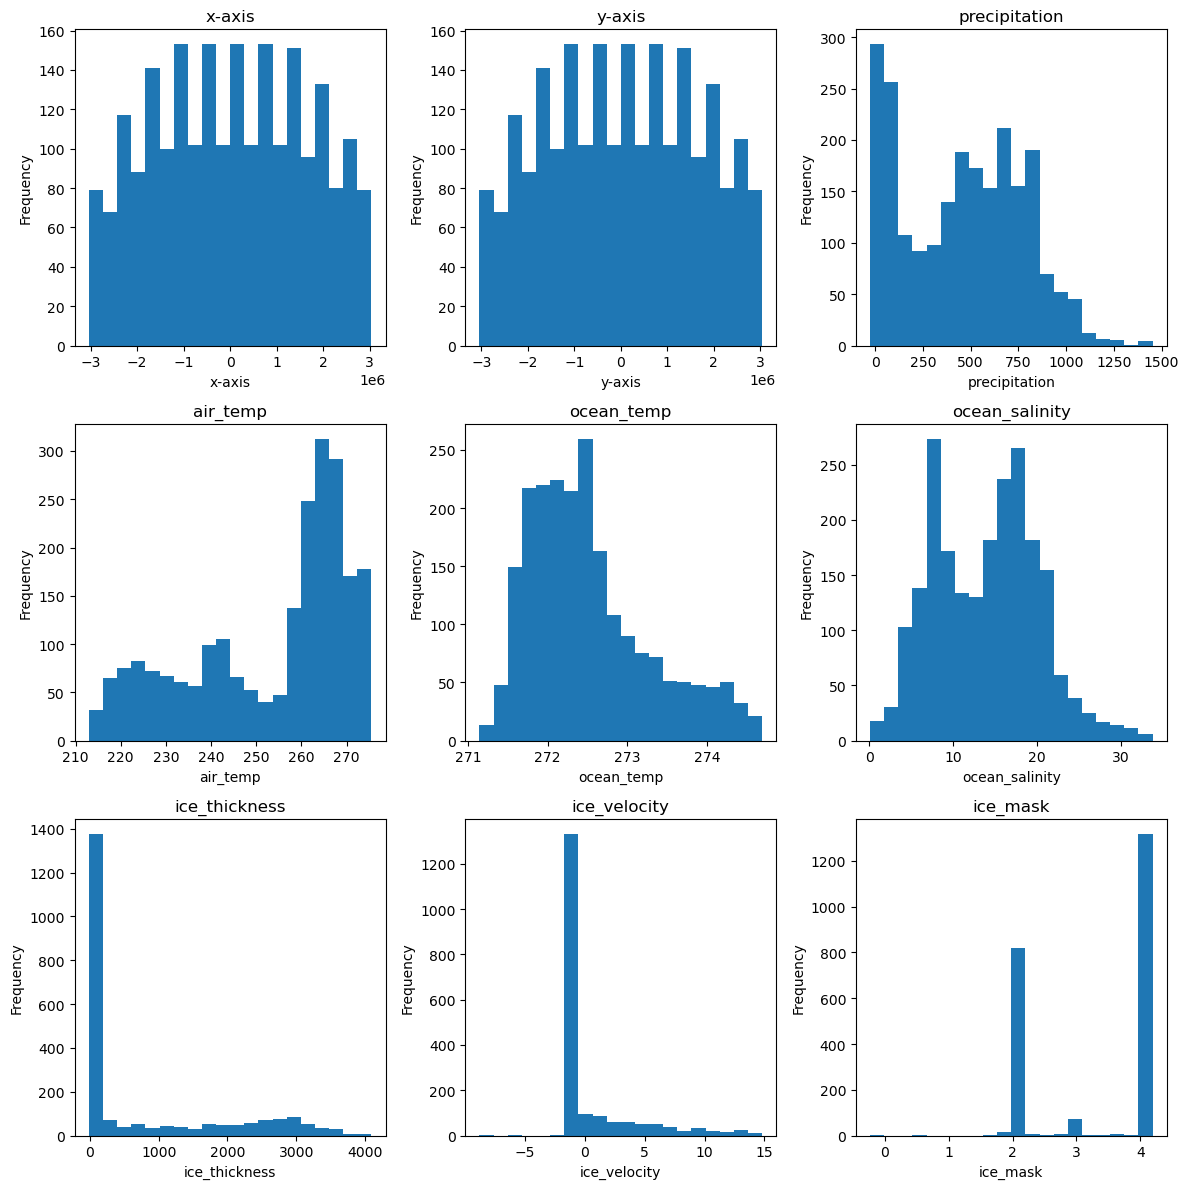

In [49]:

def plot_attribute_distributions_with_outliers_removed(df):
    attributes = df.columns  # List of all column names in the DataFrame
    n_attributes = len(attributes)
    
    # Calculate the number of rows needed for two columns
    nrows = (n_attributes + 1) // 3
    
    # Set up the matplotlib figure with two columns
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(12, nrows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, attribute in enumerate(attributes):
        # Removing outliers using IQR
        Q1 = df[attribute].quantile(0.25)
        Q3 = df[attribute].quantile(0.75)
        IQR = Q3 - Q1
        
        #I used a factor of 1.5 - just because it seems a common choice 
        filtered_df = df[(df[attribute] >= (Q1 - 1.5 * IQR)) & (df[attribute] <= (Q3 + 1.5 * IQR))]

        # Plotting the histogram for each attribute
        filtered_df[attribute].plot(kind='hist', bins=20, ax=axes[i])
        axes[i].set_title(f'{attribute}')
        axes[i].set_xlabel(attribute)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, nrows * 2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_attribute_distributions_with_outliers_removed(full_df)


In [50]:
full_df.describe()

,x-axis,y-axis,precipitation,air_temp,ocean_temp,ocean_salinity,ice_thickness,ice_velocity,ice_mask
count,2.257000e+03,2.257000e+03,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000
mean,0.000000e+00,0.000000e+00,459.218673,253.250122,272.661120,14.612805,786.863560,32.871003,3.211739
std,1.632339e+06,1.632339e+06,321.010247,17.451287,0.989742,7.036216,1165.988340,179.369400,0.959850
min,-3.040000e+06,-3.040000e+06,-26.648338,212.949539,271.142242,0.112596,-16.252274,-123.940895,-0.229760
25%,-1.337600e+06,-1.337600e+06,128.605972,239.715210,271.964874,8.552329,0.000000,-1.000000,2.000000
50%,0.000000e+00,0.000000e+00,477.346161,260.951752,272.414734,14.867147,0.000000,-1.000000,4.000000
75%,1.337600e+06,1.337600e+06,704.524414,266.593628,273.058380,18.721558,1657.558350,5.325965,4.000000
max,3.040000e+06,3.040000e+06,2290.933838,275.501678,277.330841,35.370872,4588.459961,3421.989746,4.192000


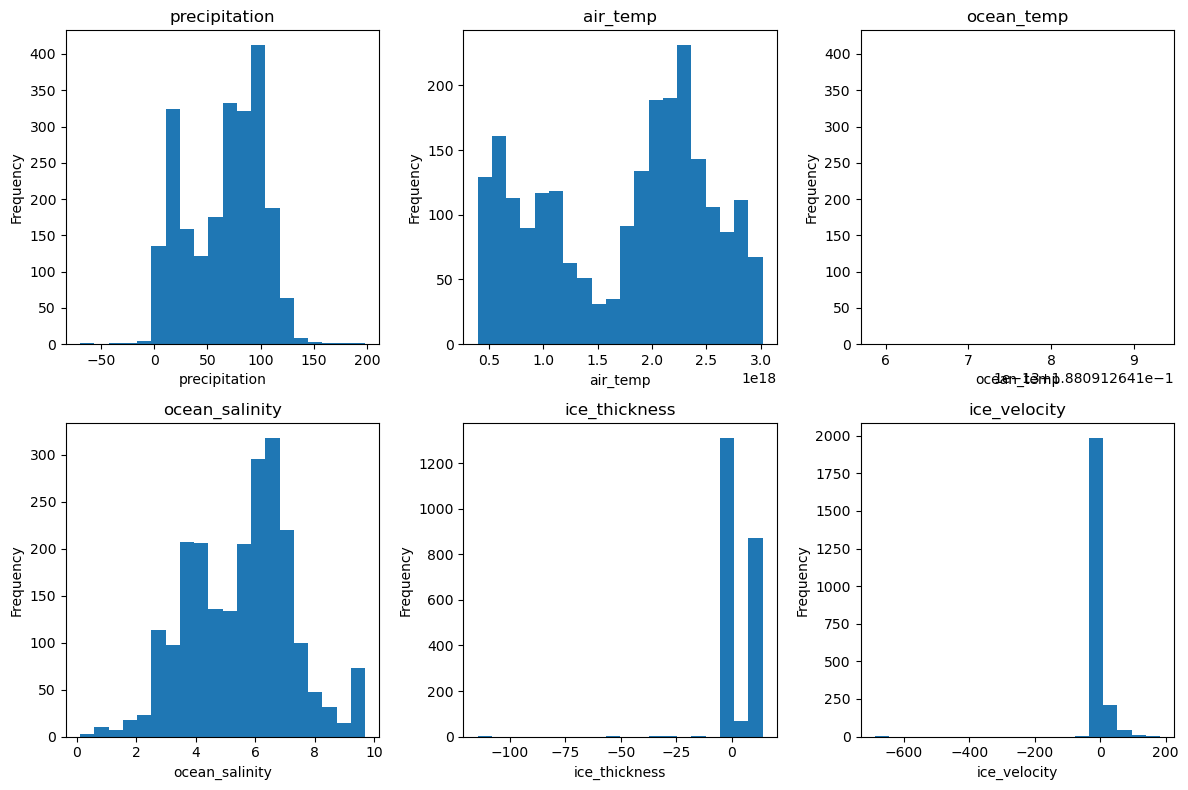

In [222]:
# #transform the attributes to help with skewness 

# #I will drop the attributes of ice_mask and x, y coords since they are not appropriate to include here

# temp_df = pd.read_csv('data/full_df-0.csv')
# temp_df = temp_df.drop(columns=['x-axis', 'y-axis', 'ice_mask'])

# temp_df.head()
# temp_df.fillna(df.mean(), inplace=True)
# transformed_df, transformation_lambdas = stats.yeojohnson(temp_df)

# #plot_attribute_distributions(transforemd_df)


# Assuming df is your DataFrame
# Convert all columns to numeric, coercing errors to NaN

temp = pd.read_csv('data/full_df-0.csv')
temp = temp.drop(columns=['x-axis', 'y-axis', 'ice_mask'])

def apply_yeojohnson_transformation(df):
    transformed_df = pd.DataFrame()
    lambdas = []

    for column in df.columns:
        transformed_col, lambda_val = stats.yeojohnson(df[column])
        transformed_df[column] = transformed_col
        lambdas.append(lambda_val)

    return transformed_df, lambdas

temp, lambdas = apply_yeojohnson_transformation(temp)

plot_attribute_distributions(temp)



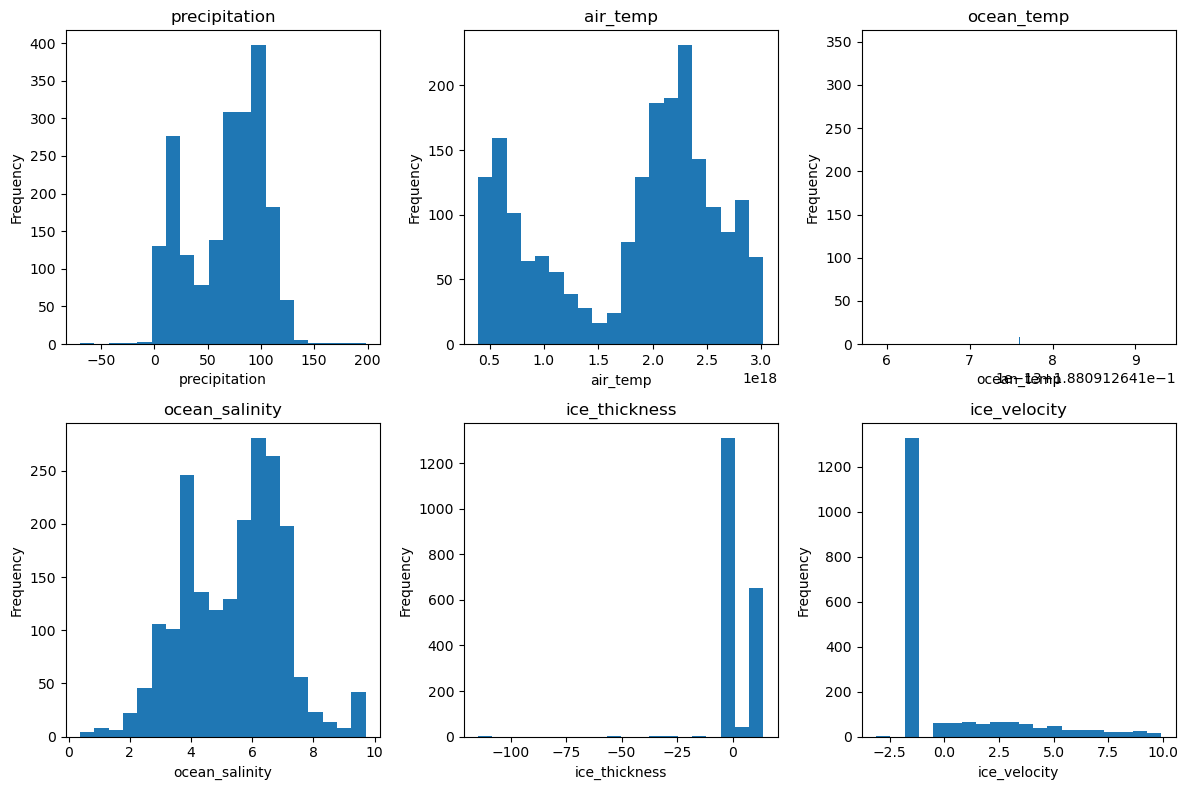

In [224]:
#trying yeo johnson distribution with outliers removed

def remove_outliers(df):
    attributes = df.columns  # List of all column names in the DataFrame
    n_attributes = len(attributes)
    for i, attribute in enumerate(attributes):
        # Removing outliers using IQR
        Q1 = df[attribute].quantile(0.25)
        Q3 = df[attribute].quantile(0.75)
        IQR = Q3 - Q1
        
        #I used a factor of 1.5 - just because it seems a common choice 
        filtered_df = df[(df[attribute] >= (Q1 - 1.5 * IQR)) & (df[attribute] <= (Q3 + 1.5 * IQR))]
    return filtered_df

outliers_removed = remove_outliers(temp)
plot_attribute_distributions(outliers_removed)


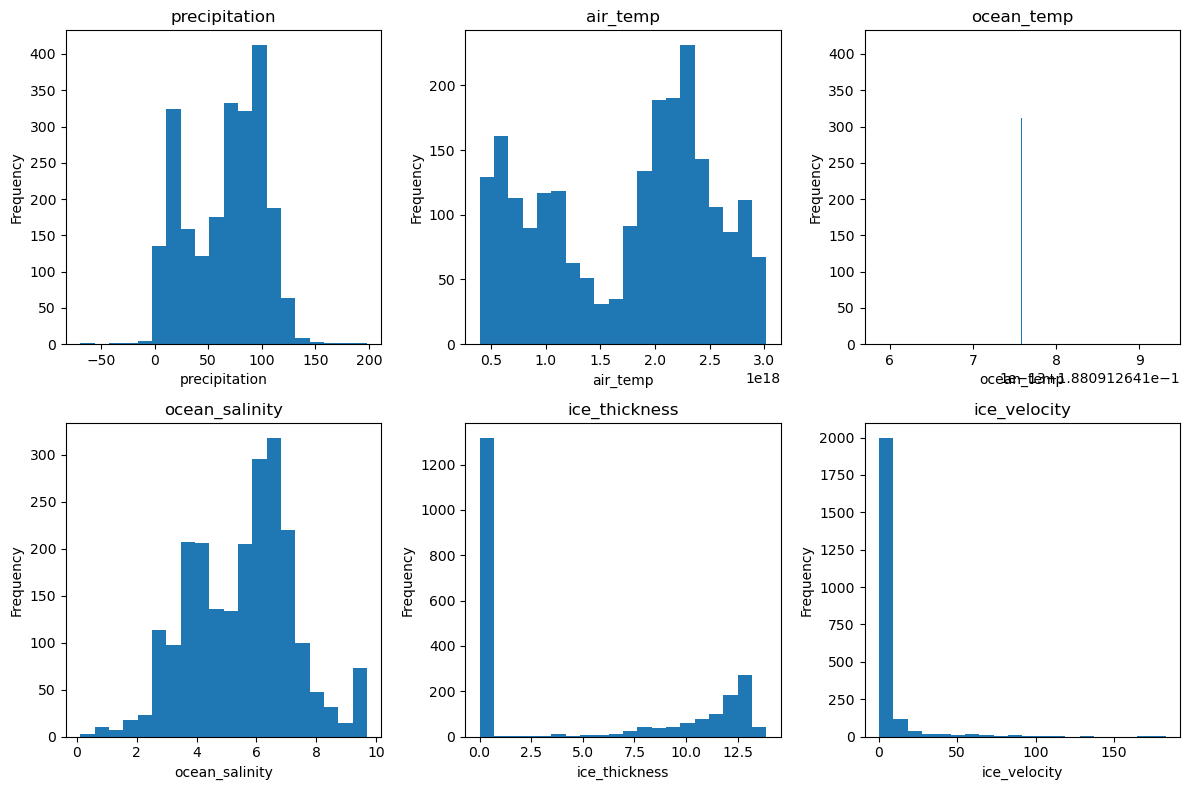

In [225]:
def remove_negative_targets(df):
    #this method takes any negative values for the columns ice thickness and ice velocity, and sets them to 0
    #it then returns the df without negative targets 
    if 'ice_thickness' in df.columns:
        df['ice_thickness'] = df['ice_thickness'].apply(lambda x: max(x, 0))
    
    if 'ice_velocity' in df.columns:
        df['ice_velocity'] = df['ice_velocity'].apply(lambda x: max(x, 0))

    return df

positive_targets = remove_negative_targets(temp)

plot_attribute_distributions(temp)

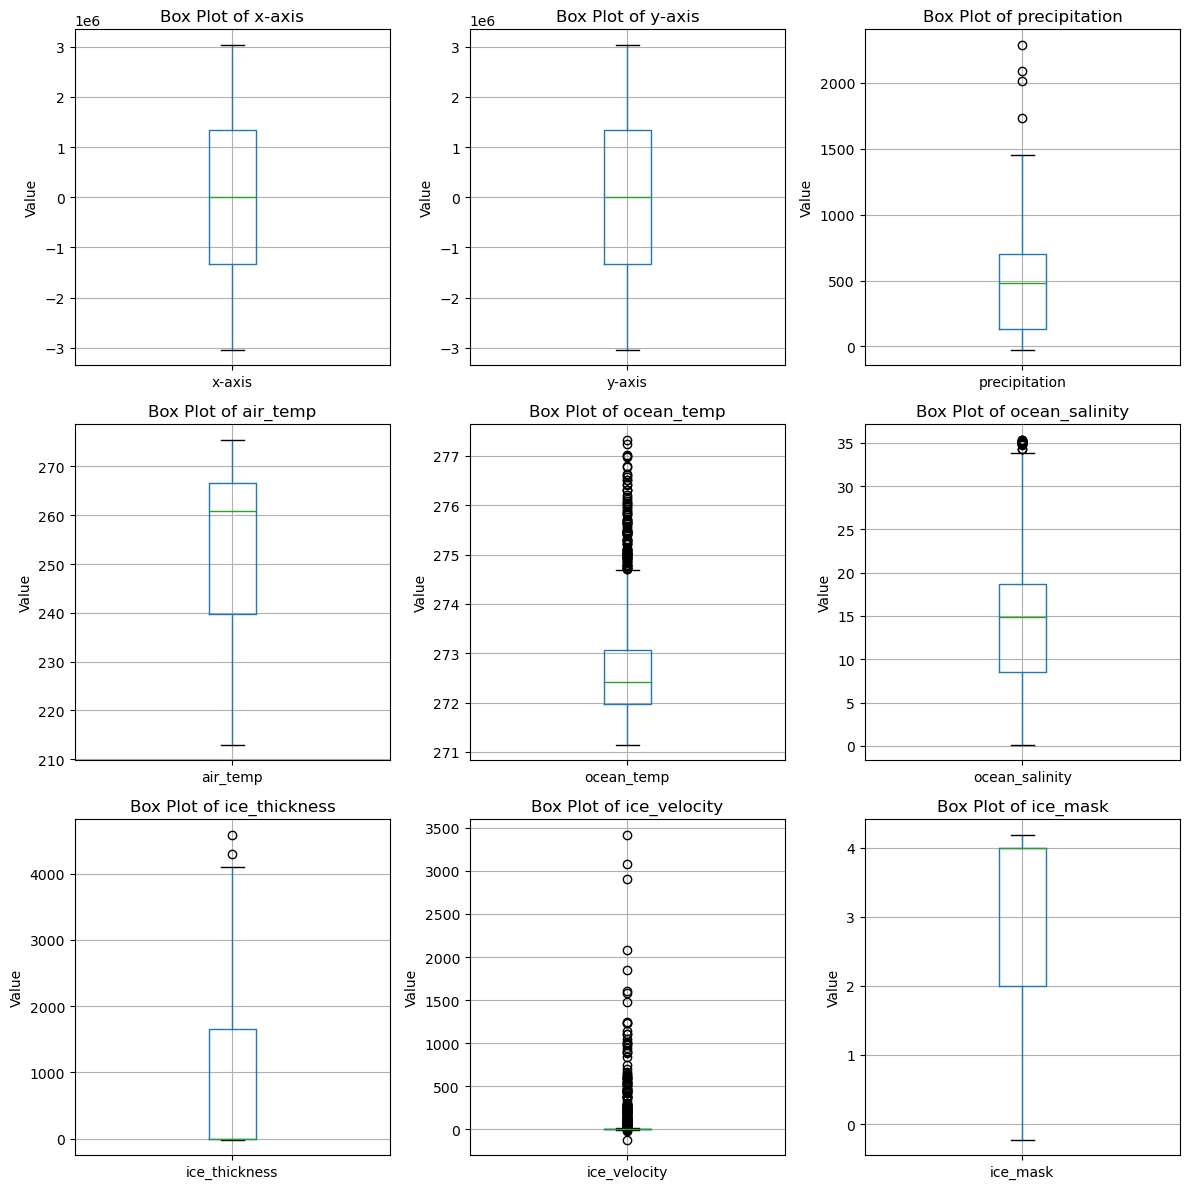

In [56]:
import matplotlib.pyplot as plt

def plot_boxplots(df):
    # Exclude the last feature 'ice mask'
    features = df.columns
    n_features = len(features)
    
    # Calculate the number of rows needed for two columns
    nrows = (n_features + 1) // 3
    
    # Set up the matplotlib figure with two columns
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(12, nrows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, feature in enumerate(features):
        # Plotting the box plot for each feature
        df.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(f'Box Plot of {feature}')
        axes[i].set_ylabel('Value')

    # Hide any unused subplots
    for j in range(i + 1, nrows * 2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_boxplots(full_df)


In [60]:
from scipy import stats

def calculate_trimmed_means(df, proportion_to_trim=0.2):

    trimmed_means = {}
    for attribute in df.columns:
        trimmed_mean = stats.trim_mean(df[attribute], proportion_to_trim)
        trimmed_means[attribute] = trimmed_mean

    return trimmed_means

trimmed_means = calculate_trimmed_means(full_df)
print(trimmed_means)


{'x-axis': 0.0, 'y-axis': 0.0, 'precipitation': 451.99643968533417, 'air_temp': 256.7580006954856, 'ocean_temp': 272.4490078071063, 'ocean_salinity': 14.17602688905458, 'ice_thickness': 358.7937891272217, 'ice_velocity': 0.44949829194427154, 'ice_mask': 3.356051553571343}


In [70]:
import numpy as np

def calculate_metrics_separate_dataframes(df, proportion_to_trim=0.1):

    # Initialize lists to store data for untrimmed and trimmed metrics
    attributes, untrimmed_ranges, untrimmed_variances, untrimmed_std_devs = [], [], [], []
    trimmed_ranges, trimmed_variances, trimmed_std_devs = [], [], []

    for attribute in df.columns:
        data = df[attribute]
        trimmed_data = stats.trimboth(data, proportion_to_trim)

        # Untrimmed metrics
        attributes.append(attribute)
        untrimmed_ranges.append(np.ptp(data))
        untrimmed_variances.append(np.var(data, ddof=1)) 
        untrimmed_std_devs.append(np.std(data, ddof=1)) 

        # Trimmed metrics
        trimmed_ranges.append(np.ptp(trimmed_data))
        trimmed_variances.append(np.var(trimmed_data, ddof=1))
        trimmed_std_devs.append(np.std(trimmed_data, ddof=1))

    # Creating the DataFrames
    untrimmed_metrics_df = pd.DataFrame({
        'Attribute': attributes,
        'Range': untrimmed_ranges,
        'Variance': untrimmed_variances,
        'Standard Deviation': untrimmed_std_devs
    })

    trimmed_metrics_df = pd.DataFrame({
        'Attribute': attributes,
        'Range': trimmed_ranges,
        'Variance': trimmed_variances,
        'Standard Deviation': trimmed_std_devs
    })

    return untrimmed_metrics_df, trimmed_metrics_df

# Example usage
untrimmed_metrics_df, trimmed_metrics_df = calculate_metrics_separate_dataframes(full_df)
print(untrimmed_metrics_df)


        Attribute         Range      Variance  Standard Deviation
0          x-axis  6.080000e+06  2.663350e+12        1.631977e+06
1          y-axis  6.080000e+06  2.663350e+12        1.631977e+06
2   precipitation  2.317582e+03  1.030019e+05        3.209391e+02
3        air_temp  6.255214e+01  3.044125e+02        1.744742e+01
4      ocean_temp  6.188599e+00  9.791557e-01        9.895229e-01
5  ocean_salinity  3.525828e+01  4.948640e+01        7.034657e+00
6   ice_thickness  4.604712e+03  1.358926e+06        1.165730e+03
7    ice_velocity  3.545931e+03  3.215913e+04        1.793297e+02
8        ice_mask  4.421760e+00  9.209044e-01        9.596377e-01


In [71]:
print(trimmed_metrics_df)


        Attribute         Range      Variance  Standard Deviation
0          x-axis  4.377600e+06  1.588520e+12        1.260365e+06
1          y-axis  4.377600e+06  1.588520e+12        1.260365e+06
2   precipitation  8.143723e+02  6.425974e+04        2.534950e+02
3        air_temp  4.709206e+01  1.853194e+02        1.361321e+01
4      ocean_temp  2.428772e+00  3.525475e-01        5.937571e-01
5  ocean_salinity  1.616575e+01  2.125779e+01        4.610617e+00
6   ice_thickness  2.838102e+03  8.385499e+05        9.157237e+02
7    ice_velocity  3.030886e+01  3.809751e+01        6.172318e+00
8        ice_mask  2.000000e+00  8.756201e-01        9.357458e-01


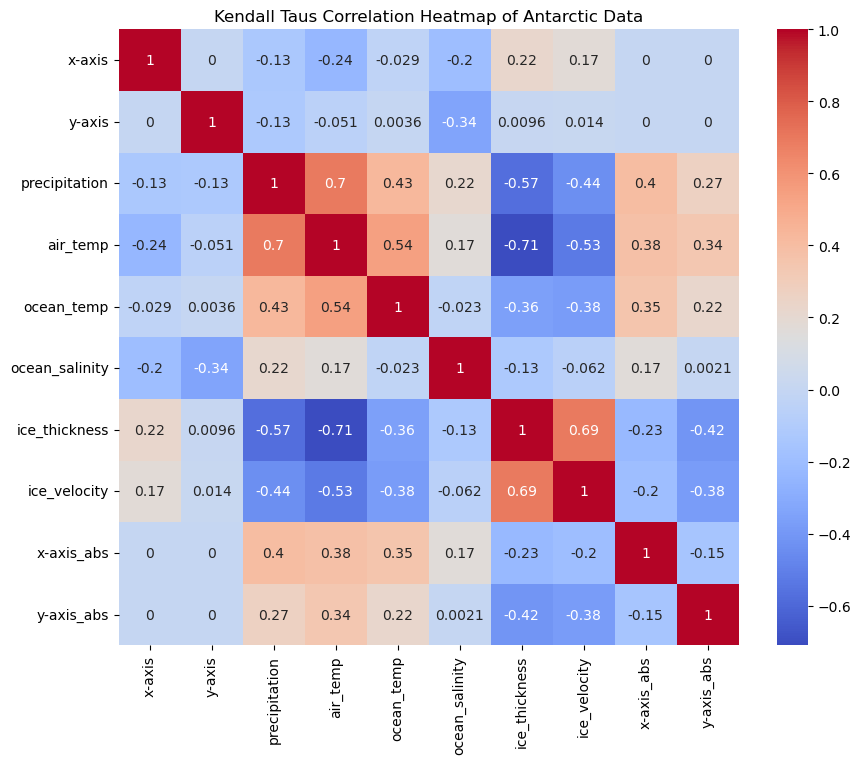

In [228]:
## CORRELATION HEATMAP 
import seaborn as sns

continuous_df = full_df.drop(columns=['ice_mask'])  # Drop the categorical column

# Calculate the correlation matrix -> use method = 'spearman', or method = "kendall"
corr_matrix = continuous_df.corr(method = 'kendall')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Kendall Taus Correlation Heatmap of Antarctic Data')
plt.show()

In [141]:
# Rounding up/down the ice_mask values
def custom_round(value, choices=[2, 3, 4]):
    return min(choices, key=lambda x: abs(x - value))

rounded_full_df = full_df.copy()
rounded_full_df["ice_mask"] = rounded_full_df["ice_mask"].apply(custom_round)

# Splitting into grounded ice, floating ice, and open ocean sets
# Use .loc to create copies for each condition
grounded_ice = rounded_full_df.loc[rounded_full_df['ice_mask'] == 2].copy()
floating_ice = rounded_full_df.loc[rounded_full_df['ice_mask'] == 3].copy()
open_ocean = rounded_full_df.loc[rounded_full_df['ice_mask'] == 4].copy()



#checking for nans, and filling if thats the case (cannot have nans for the kruskal test)
from pandas.api.types import is_numeric_dtype

def fill_missing_values(df):
    for column in df.columns:
        if is_numeric_dtype(df[column]):
            # Fill numeric columns with the mean
            df[column] = df[column].fillna(df[column].mean())
        else:
            # Fill categorical columns with the most common value
            df[column] = df[column].fillna(df[column].mode()[0])
    return df

fill_missing_values(grounded_ice)
fill_missing_values(floating_ice)
fill_missing_values(open_ocean)
fill_missing_values(rounded_full_df)

,x-axis,y-axis,precipitation,air_temp,ocean_temp,ocean_salinity,ice_thickness,ice_velocity,ice_mask
0,-1337600,3040000,437.321442,266.841583,272.705383,12.659061,0.0,-1.0,4
1,-1216000,3040000,408.996857,266.624084,272.611725,12.383535,0.0,-1.0,4
2,-1094400,3040000,394.199585,266.458008,272.541992,12.030684,0.0,-1.0,4
3,-972800,3040000,383.704193,266.339508,272.491638,11.602744,0.0,-1.0,4
4,-851200,3040000,380.570068,266.326416,272.446899,11.102610,0.0,-1.0,4
...,...,...,...,...,...,...,...,...,...
2252,851200,-3040000,873.747070,266.818176,272.680603,20.691202,0.0,-1.0,4
2253,972800,-3040000,896.603088,267.198212,272.779999,21.246033,0.0,-1.0,4
2254,1094400,-3040000,940.338806,267.711700,272.914429,21.702059,0.0,-1.0,4
2255,1216000,-3040000,965.731323,268.477997,273.058350,22.040932,0.0,-1.0,4


In [138]:
from scipy.stats import kruskal

# List of numerical columns
numerical_columns = rounded_full_df.columns[:-1]  # Assuming the last column is the categorical column

# Perform Kruskal-Wallis test for each numerical column
for col in numerical_columns:
    grounded_ice = rounded_full_df[rounded_full_df['ice_mask'] == 2.0][col]
    floating_ice = rounded_full_df[rounded_full_df['ice_mask'] == 3.0][col]
    open_ocean = rounded_full_df[rounded_full_df['ice_mask'] == 4.0][col]

    stat, p = kruskal(grounded_ice, floating_ice, open_ocean)

    print(f'Column: {col}, Statistics={stat:.3f}, p={p:.3f}')




Column: x-axis, Statistics=145.567, p=0.000
Column: y-axis, Statistics=2.772, p=0.250
Column: precipitation, Statistics=1160.095, p=0.000
Column: air_temp, Statistics=1626.766, p=0.000
Column: ocean_temp, Statistics=669.852, p=0.000
Column: ocean_salinity, Statistics=158.062, p=0.000
Column: ice_thickness, Statistics=2055.949, p=0.000
Column: ice_velocity, Statistics=2030.698, p=0.000


In [153]:
grounded_ice.drop(columns = ["x-axis", "y-axis", "ice_mask"], inplace = False).describe()

,precipitation,air_temp,ocean_temp,ocean_salinity,ice_thickness,ice_velocity
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,184.802032,233.924177,272.126284,13.185270,2062.660659,45.283234
std,262.741512,11.767675,0.468296,8.253445,1007.920814,211.638097
min,-26.648338,212.949539,271.292450,0.411112,-4.296569,-123.940895
25%,35.543363,223.681377,271.796913,7.948195,1245.497772,2.229949
50%,79.863705,233.300346,272.040909,10.053563,2236.282104,6.813557
75%,227.219154,242.969360,272.352539,16.367814,2878.373230,19.546751
max,2290.933838,263.707306,274.562714,35.370872,4588.459961,3077.056885


In [152]:
floating_ice.drop(columns = ["x-axis", "y-axis", "ice_mask"], inplace = False).describe()

,precipitation,air_temp,ocean_temp,ocean_salinity,ice_thickness,ice_velocity
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,266.609325,245.920255,271.789551,19.772898,440.622168,424.867857
std,257.349431,7.381410,0.447807,8.163466,350.267001,476.334826
min,17.771433,236.213455,271.142242,0.112596,4.495520,-1.000000
25%,62.077200,240.291653,271.497406,15.197217,238.946877,118.559994
50%,184.724777,243.137642,271.719284,21.102525,339.838516,280.605972
75%,391.924377,251.081676,271.954399,25.993484,522.180038,550.524872
max,1402.249756,262.473450,274.039551,33.792068,2248.380859,3421.989746


In [151]:
open_ocean.drop(columns = ["x-axis", "y-axis", "ice_mask"], inplace = False).describe()

,precipitation,air_temp,ocean_temp,ocean_salinity,ice_thickness,ice_velocity
count,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.0
mean,646.112746,265.998784,273.058280,15.176405,0.313512,-1.0
std,204.832739,4.833200,1.060415,5.768539,5.927105,0.0
min,3.531597,246.850708,271.309692,0.775797,-16.252274,-1.0
25%,487.001190,262.343460,272.337479,11.397172,0.000000,-1.0
50%,649.958069,265.954224,272.744141,16.281748,0.000000,-1.0
75%,798.629303,269.491150,273.656540,18.977881,0.000000,-1.0
max,1731.846802,275.501678,277.330841,35.242767,166.416245,-1.0


/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


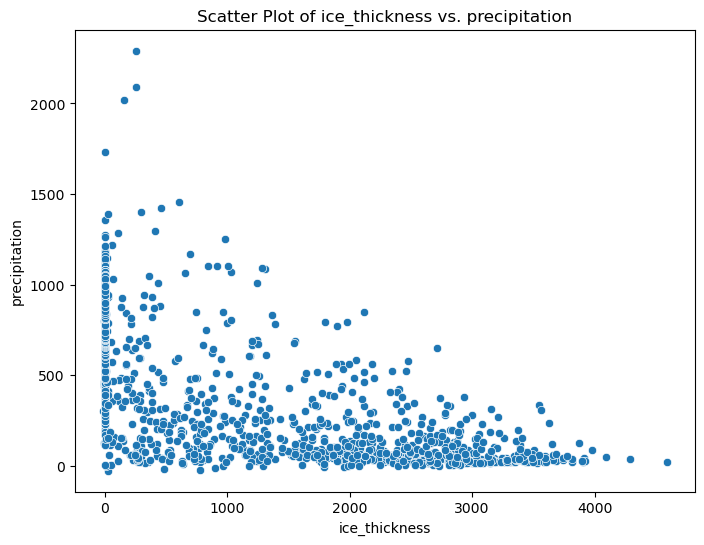

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


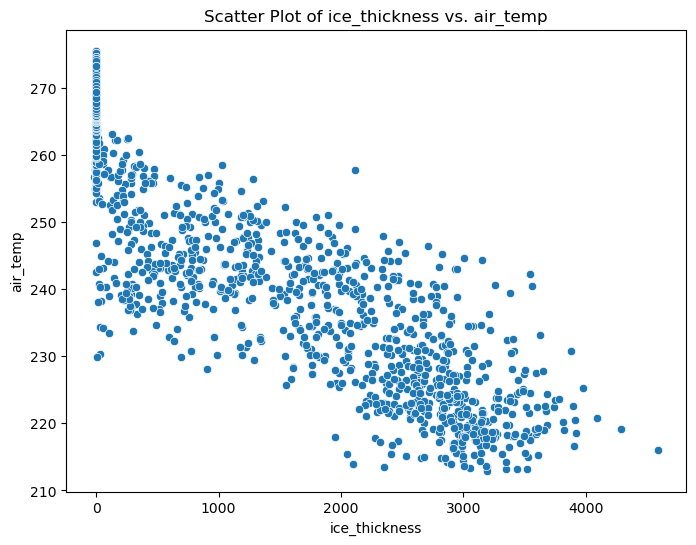

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


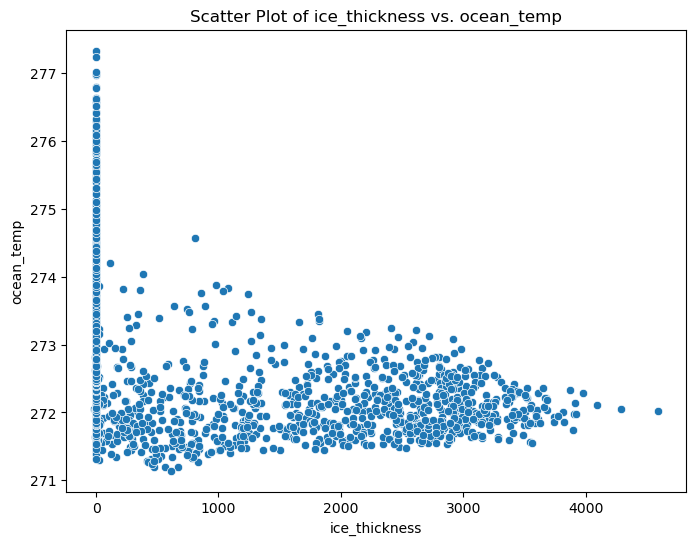

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


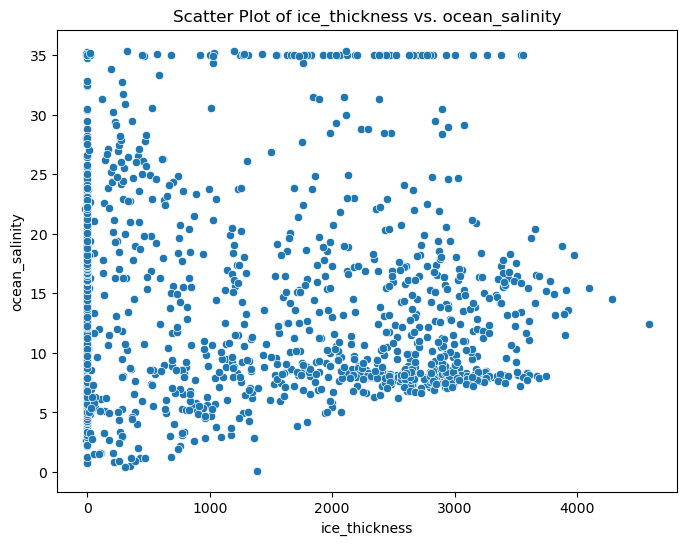

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


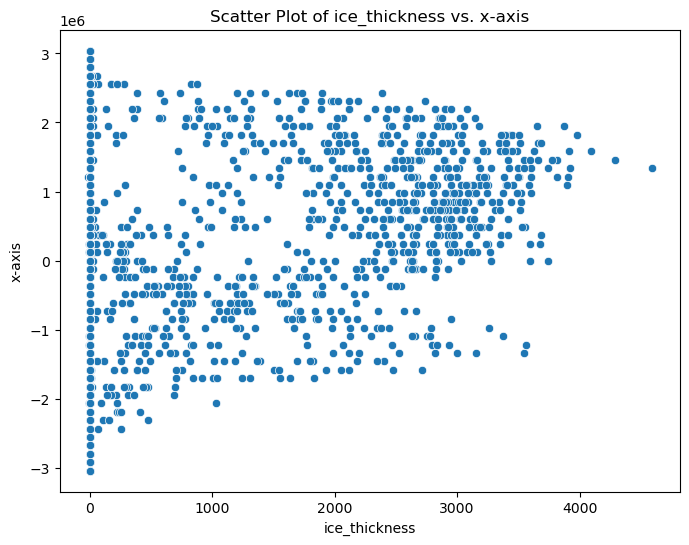

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


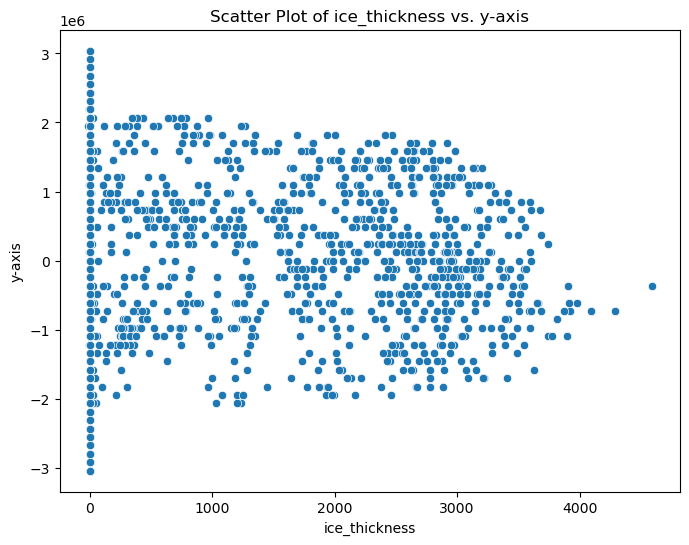

In [175]:
#SCATTER PLOTS 

features = ["precipitation", "air_temp", "ocean_temp", "ocean_salinity", "x-axis", "y-axis"]  
target = "ice_thickness"

#scatter_df = pd.read_csv('/data/full_df-0.csv')


for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=full_df[target], y=full_df[feature])
    plt.title(f"Scatter Plot of {target} vs. {feature}")
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()
    


/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

IndexError: index 5 is out of bounds for axis 0 with size 5

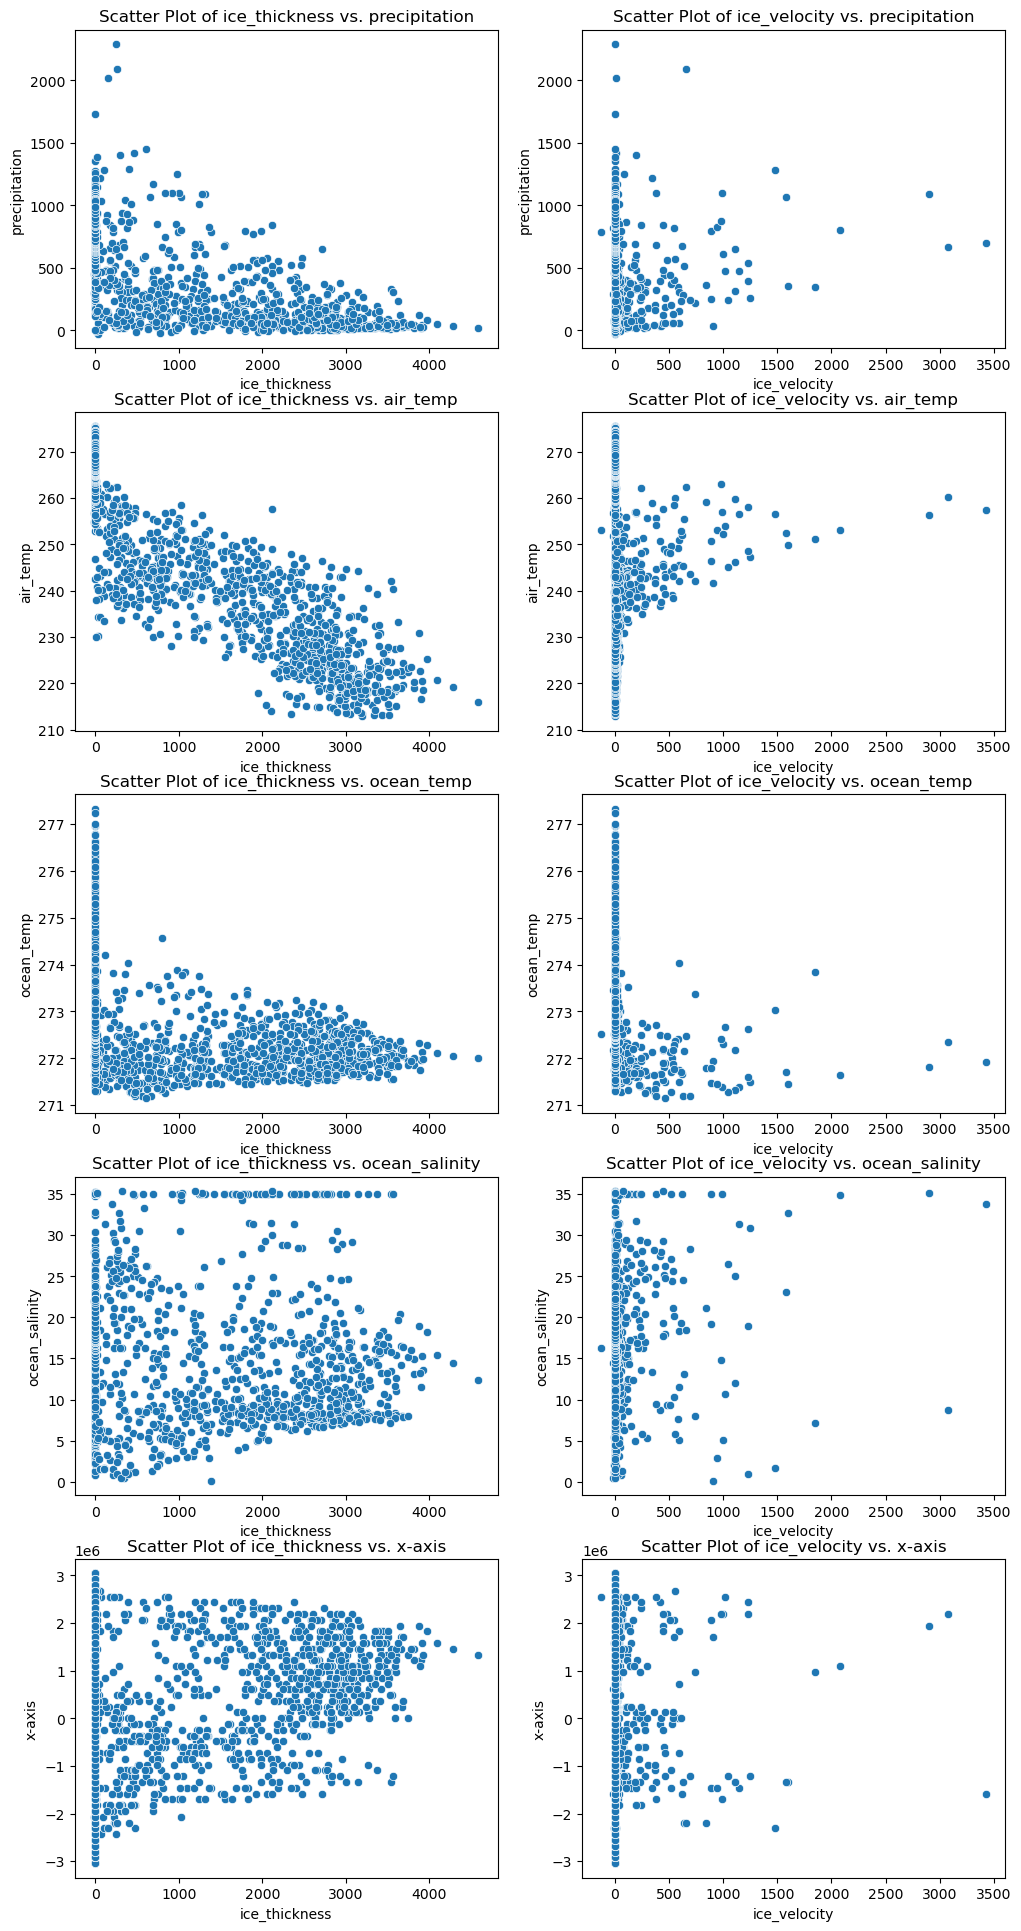

In [200]:



def show_scatterplots(df, features, targets):
    
    # Create a figure with 4 rows and 2 columns
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 24))

    for i, feature in enumerate(features):
        for j, target in enumerate(targets):
            sns.scatterplot(x=df[target], y=df[feature], ax=axes[i, j])
            axes[i, j].set_title(f"Scatter Plot of {target} vs. {feature}")
            axes[i, j].set_xlabel(target)
            axes[i, j].set_ylabel(feature)

    plt.tight_layout()
    plt.show()
    

features = ["precipitation", "air_temp", "ocean_temp", "ocean_salinity", "x-axis", "y-axis"]  
targets = ["ice_thickness", "ice_velocity"]

show_scatterplots(full_df, features, targets)

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

IndexError: index 5 is out of bounds for axis 0 with size 5

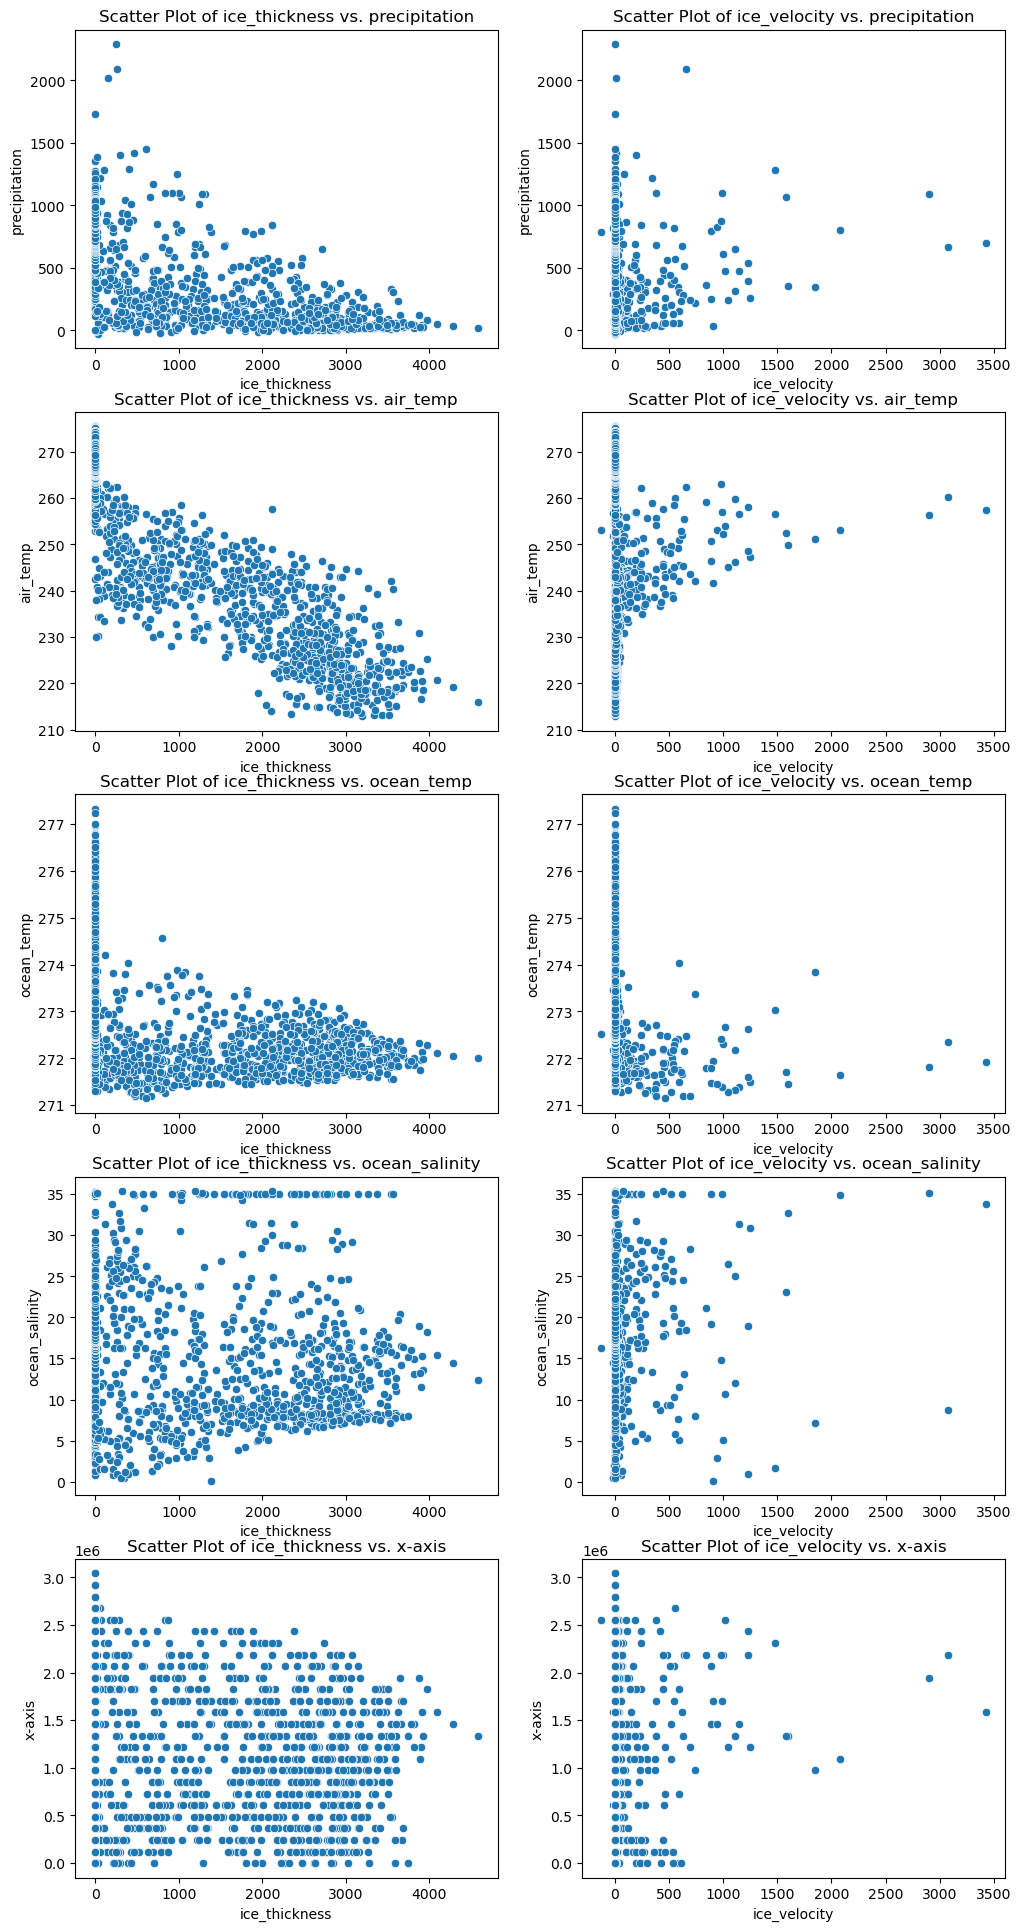

In [201]:
def absolute_values(df, cols):
#this method takes the df, and returns it with the absolute values of numbers in the given columns 
    for col in cols:
        # Check if the column exists in the DataFrame
        if col in df.columns:
            # Apply absolute value transformation
            df[col] = df[col].abs()

    return df


cols = ["x-axis", "y-axis"]
absolute_vals = full_df.copy()
absolute_vals = absolute_values(absolute_vals, cols)

features = ["precipitation", "air_temp", "ocean_temp", "ocean_salinity", "x-axis", "y-axis"]  
targets = ["ice_thickness", "ice_velocity"]

show_scatterplots(absolute_vals, features, targets)


/var/folders/0l/2bm1dm6x30bgy1z__x229vkr0000gn/T/ipykernel_83263/1936284626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x-axis_abs'] = df['x-axis'].abs()
/var/folders/0l/2bm1dm6x30bgy1z__x229vkr0000gn/T/ipykernel_83263/1936284626.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y-axis_abs'] = df['y-axis'].abs()


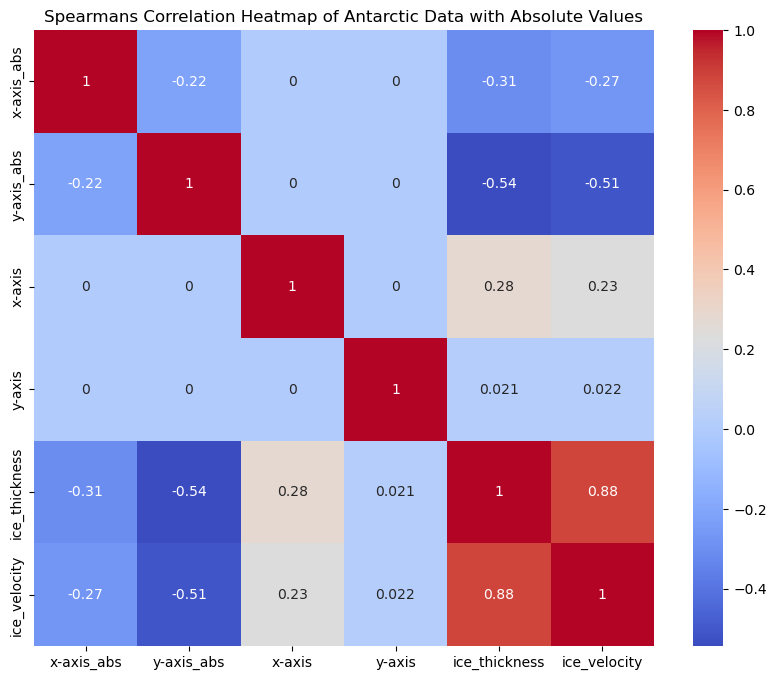

In [231]:
#looking at the absolute and non aboslute values of x and y, vs ice thickness and velocity 

def process_dataframe(df):
    # Retain only the specified columns
    columns_to_keep = ['x-axis', 'y-axis', 'ice_thickness', 'ice_velocity']
    df = df[columns_to_keep]

    # Create new columns with absolute values
    df['x-axis_abs'] = df['x-axis'].abs()
    df['y-axis_abs'] = df['y-axis'].abs()

    return df

abs_coords = process_dataframe(full_df)

features = ['x-axis_abs', 'y-axis_abs', "x-axis", "y-axis"]  
targets = ['ice_thickness', 'ice_velocity']

corr_matrix = abs_coords[features + targets].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Spearmans Correlation Heatmap of Antarctic Data with Absolute Values')
plt.show()

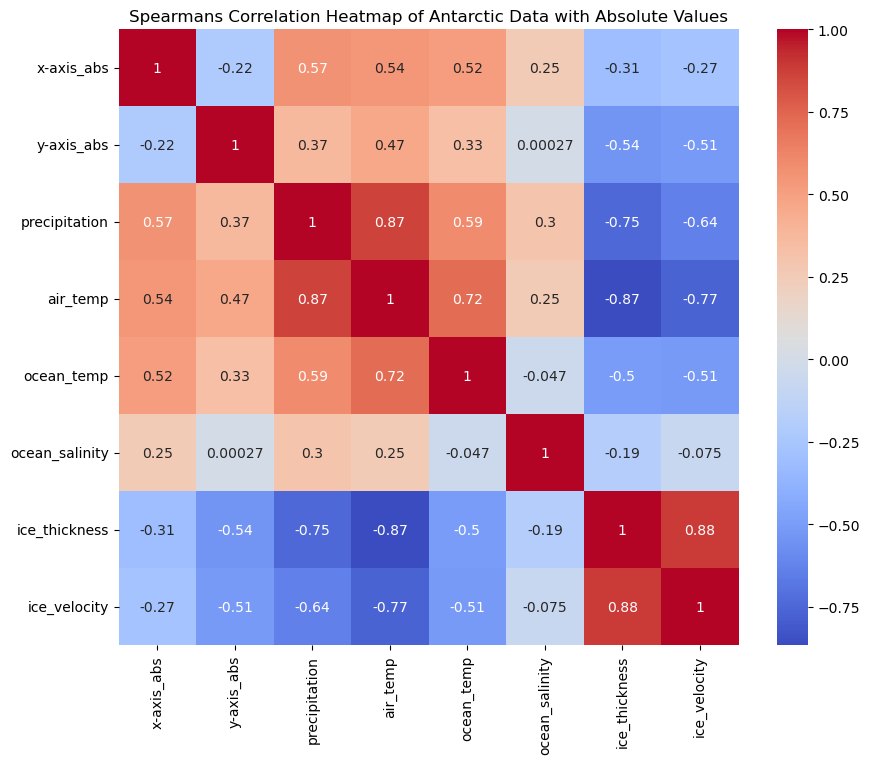

In [232]:

def process_dataframe(df):
    # Retain only the specified columns
    #columns_to_keep = ['x-axis', 'y-axis', 'ice_thickness', 'ice_velocity']
    #df = df[columns_to_keep]

    # Create new columns with absolute values
    df['x-axis_abs'] = df['x-axis'].abs()
    df['y-axis_abs'] = df['y-axis'].abs()

    return df

abs_coords = process_dataframe(full_df)

features = ['x-axis_abs', 'y-axis_abs', "precipitation", "air_temp", "ocean_temp", "ocean_salinity"]  
targets = ['ice_thickness', 'ice_velocity']

corr_matrix = abs_coords[features + targets].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Spearmans Correlation Heatmap of Antarctic Data with Absolute Values')
plt.show()